# Sprint 4: Visualización gráfica de datos. Visualización exploratoria

## Tarea M4 T01


In [10]:
#Ejercicio 1:Descarga el dataset adjunto precio alquiler por trimestre y barri.csv  extraído de la web OpenDataBCN y resume estadísticamente y gráficamente.

#Crea al menos una visualización para:

#Una variable categórica (Distrito o Barrio)
#Una variable numérica (Precio)
#Una variable numérica y una categórica (Distrito y Precio)
#Dos variables numéricas (Año o Trimestre y Precio)
#Tres variables (Barrio o Distrito, Trimestre y Precio)

import matplotlib
import pandas as pd 

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")

df.head()
               

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [3]:
df.shape

(584, 8)

In [4]:
df.dtypes

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

In [ ]:
# limpieza de datos, eliminar datos redundantes: 

df.drop(['Codi_Districte', 'Codi_Barri'], axis=1, inplace=True)


He eliminado las columnas 'Codi_Districte y 'Codi_Barri' porque me parecio que no eran necesarios. He decidio mantener solo el nombre del distrito y del barrio en lugar de códigos para hacer que los datos sean más legibles y comprensibles al momento de trabajar con ellos.

In [10]:
df.head()

,Any,Trimestre,Nom_Districte,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,Ciutat Vella,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,Ciutat Vella,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,Eixample,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [42]:
df.dtypes

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object

In [41]:
#Resumen Estadistico

import pandas as pd

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')


resumen_estadistico_por_distrito = df.groupby('Nom_Districte')['Preu'].agg(['mean', 'median'])
moda_por_distrito = df.groupby('Nom_Districte')['Preu'].apply(lambda x: x.mode())
resumen_estadistico_por_distrito['Moda'] = moda_por_distrito
resumen_estadistico_por_distrito.columns = ['Media', 'Mediana', 'Moda']

print("Resumen Estadístico por Distrito:")
print(resumen_estadistico_por_distrito)






Resumen Estadístico por Distrito:
                          Media  Mediana  Moda
Nom_Districte                                 
Ciutat Vella         436.350000   387.80   NaN
Eixample             506.922917   450.55   NaN
Gràcia               445.322500   379.85   NaN
Horta-Guinardó       388.497500   333.45   NaN
Les Corts            614.037500   460.30   NaN
Nou Barris           337.607500   250.40   NaN
Sant Andreu          366.175000   230.00   NaN
Sant Martí           464.945000   358.90   NaN
Sants-Montjuïc       405.805357   352.85   NaN
Sarrià-Sant Gervasi  643.112500   504.05   NaN


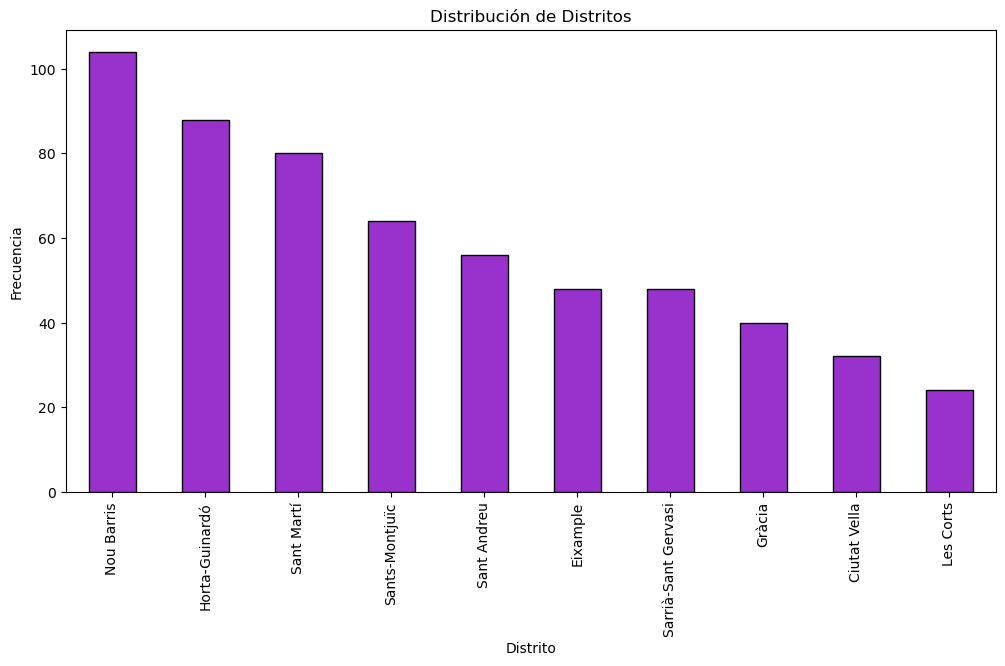

In [40]:
#Visualización: Una variable categórica (Distrito o Barrio)

import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px


frecuencia_distrito = df['Nom_Districte'].value_counts()
plt.figure(figsize=(12, 6))
frecuencia_distrito.plot(kind='bar', color='DarkOrchid', edgecolor='black')
plt.title('Distribución de Distritos')
plt.xlabel('Distrito')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

Para la visualización de la variable categórica 'Distrito', he utilizado un gráfico de barras que muestra la frecuencia de los distritos en el conjunto de datos. Cada barra representa un distrito y la altura de cada barra indica cuántas veces aparece ese distrito en los datos.

Este tipo de gráficos es útil para obtener una vista general de la distribución de una variable categórica. Se puede utilizar esta información para comprender mejor los datos que tenemos y orientar un futuro análisis o tomar decisiones relacionadas con la distribución de los distritos en el área de estudio

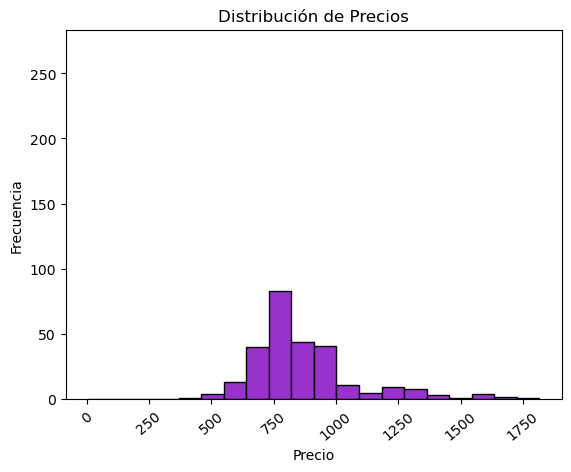

In [32]:
#Visualización: Una variable numérica (Precio)

import matplotlib.pyplot as plt


n, bins, patches = plt.hist(df['Preu'], bins=20, color='DarkOrchid', edgecolor='black')
patches[0].set_height(0)  

plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=40)
plt.show()




Para la visualización de la variable numérica 'Precio', he utilizado un histograma que muestra la distribución de los precios en el conjunto de datos. Este gráfico es una herramienta útil para comprender la distribución de precios en tu conjunto de datos, identificar tendencias y detectar valores atípicos.

Puede proporcionar información valiosa para el análisis exploratorio de datos y ayudar en la toma de decisiones relacionadas con los precios de alquiler en el área de estudio.

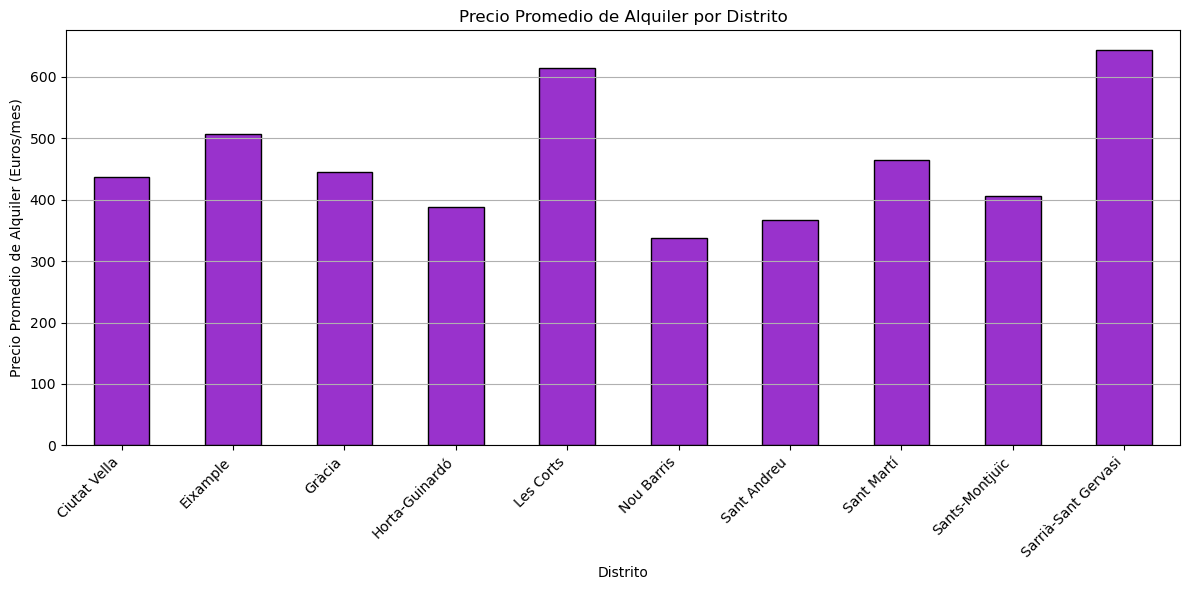

In [33]:
#Una variable numérica y una categórica (Distrito y Precio)
import pandas as pd
import matplotlib.pyplot as plt

precio_promedio_por_distrito = df.groupby('Nom_Districte')['Preu'].mean()

plt.figure(figsize=(12, 6))  
precio_promedio_por_distrito.plot(kind='bar', color='DarkOrchid', edgecolor='black')
plt.xlabel('Distrito')
plt.ylabel('Precio Promedio de Alquiler (Euros/mes)')
plt.title('Precio Promedio de Alquiler por Distrito')
plt.grid(axis='y')  

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()





Para la visualización de dos variables, una numérica 'Precio' y otra categórica 'Distrito', he vuelto a utilizar un gráfico de barras que muestra el precio promedio de alquiler por distrito. Aquí podemos comparar cómo varían los precios de alquiler en diferentes distritos del área de estudio.

Este gráfico del precio promedio de alquiler por distrito permite visualizar y comparar la variación de precios en diferentes áreas geográficas, lo que nos ayuda a comprender de mejor manera la distribución de precios en el área de análisis.

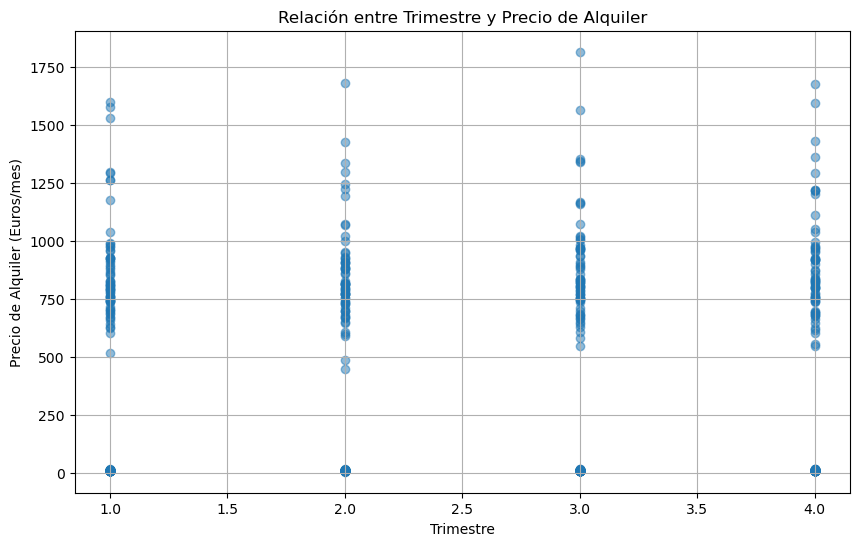

In [37]:
#Dos variables numéricas (Año o Trimestre y Precio)

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.scatter(df['Trimestre'], df['Preu'], alpha=0.5)
plt.xlabel('Trimestre')
plt.ylabel('Precio de Alquiler (Euros/mes)')
plt.title('Relación entre Trimestre y Precio de Alquiler')
plt.grid(True)

plt.show()






Para las dos variables numéricas, he utilizado un gráfico de dispersión para representar su relación. Muestra la distribución conjunta de los datos y permite identificar patrones, tendencias y relaciones. Específicamente, en este gráfico se observa cómo los precios de alquiler varían a lo largo de diferentes trimestres. Cada punto en el gráfico representa un registro en tu conjunto de datos, donde el eje x (Trimestre) muestra en qué trimestre se registró el precio y el eje y (Precio de Alquiler) muestra el valor del precio en euros por mes.

Este gráfico sirve como punto de partida para investigaciones más detalladas sobre las tendencias temporales en los precios de alquiler.

<Figure size 1200x600 with 0 Axes>

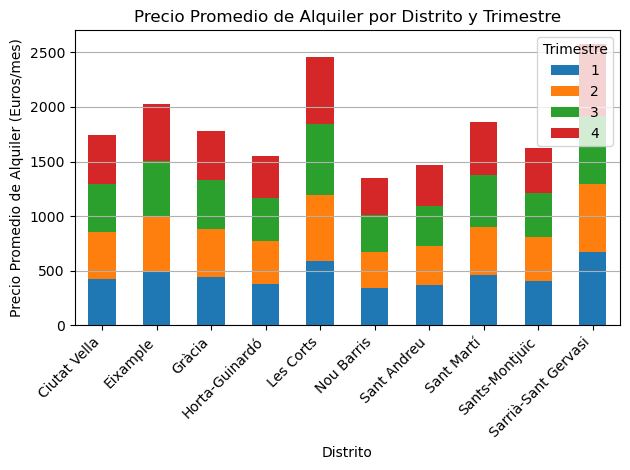

In [38]:
#Tres variables (Barrio o Distrito, Trimestre y Precio)
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) 
resumen_por_distrito_trimestre = df.groupby(['Nom_Districte', 'Trimestre'])['Preu'].mean().unstack()
resumen_por_distrito_trimestre.plot(kind='bar', stacked=True)

plt.xlabel('Distrito')
plt.ylabel('Precio Promedio de Alquiler (Euros/mes)')
plt.title('Precio Promedio de Alquiler por Distrito y Trimestre')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Para las tres variables: 'Distrito', 'Trimestre' y 'Precio', he utilizado un gráfico de barras apiladas donde se muestra el precio promedio de alquiler en función del distrito y el trimestre. Al observar las barras para un distrito específico, puedes ver cómo ha cambiado el precio promedio de alquiler a lo largo de varios trimestres. Esto puede ayudarte a identificar si los precios han aumentado, disminuido o se han mantenido estables en un distrito en particular.

Es una herramienta poderosa para comprender las tendencias y patrones en el mercado de alquiler en función de múltiples variables.

In [ ]:
#Ejercicio 2: Exporta los gráficos como imágenes o HTML.

#He exportado los gráficos en imágenes y las subire al archivo final de Github como un anexo.






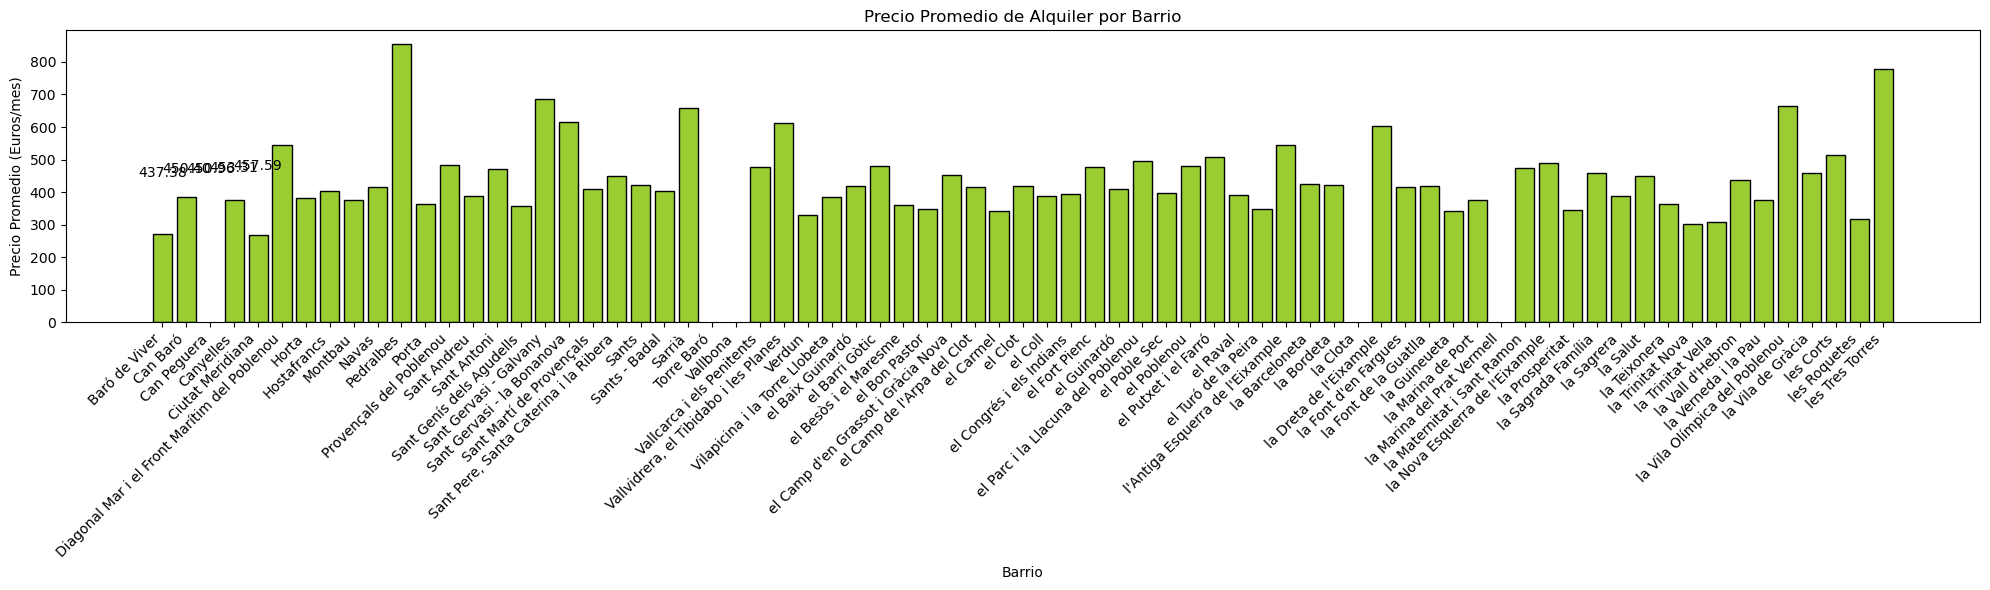

In [58]:

#Ejercicio 3: Propone alguna visualización que creas que puede resultar interesante.



import pandas as pd
import matplotlib.pyplot as plt
precio_promedio_por_barrio = df.groupby('Nom_Barri')['Preu'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(20, 6))
plt.bar(precio_promedio_por_barrio.index, precio_promedio_por_barrio, color='yellowgreen', edgecolor='black')

# Títulos y etiquetas
plt.title('Precio Promedio de Alquiler por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio (Euros/mes)')

# Rotar las etiquetas del eje x para mayor legibilidad

plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Gráfico de barras por barrio: Puedes crear un gráfico de barras que muestre el precio
promedio de alquiler en cada barrio. Esto te dará una idea inicial de cuáles son los barrios más caros. 
Utiliza el eje y para representar el precio promedio y el eje x para los nombres de los barrios.

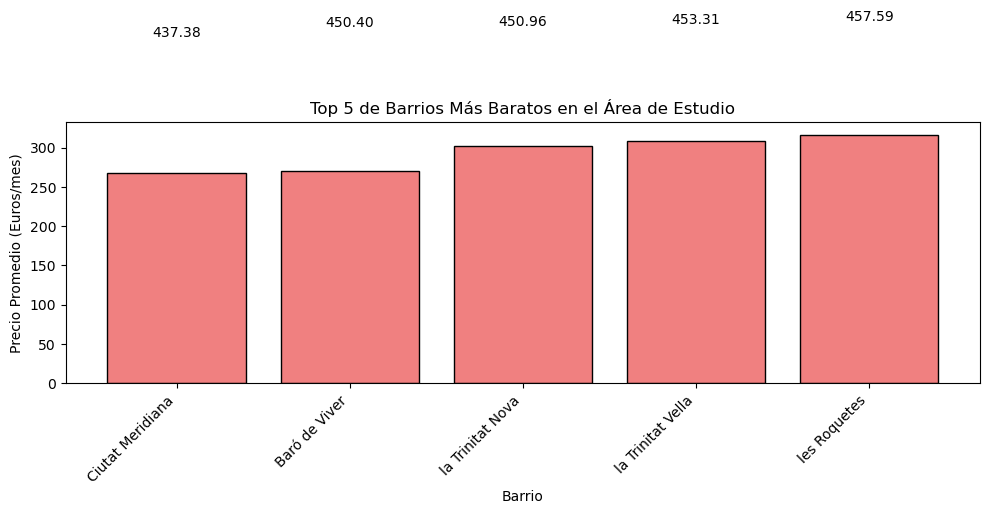

In [72]:
import matplotlib.pyplot as plt

# Calcular el precio promedio por barrio
precio_promedio_por_barrio = df.groupby('Nom_Barri')['Preu'].mean().reset_index()

# Encontrar los 5 barrios con el menor precio promedio
barrios_mas_baratos = precio_promedio_por_barrio.nsmallest(5, 'Preu')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(barrios_mas_baratos['Nom_Barri'], barrios_mas_baratos['Preu'], color='lightcoral', edgecolor='black')

# Títulos y etiquetas
plt.title('Top 5 de Barrios Más Baratos en el Área de Estudio')
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio (Euros/mes)')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha="right")

# Agregar etiquetas de precios bajos de cada barra

for rect in bar:
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2, height,
        f'{height:.2f}',  # Formato para mostrar dos decimales
        ha='center', va='bottom'
)
# Mostrar el gráfico
plt.tight_layout()
plt.show()



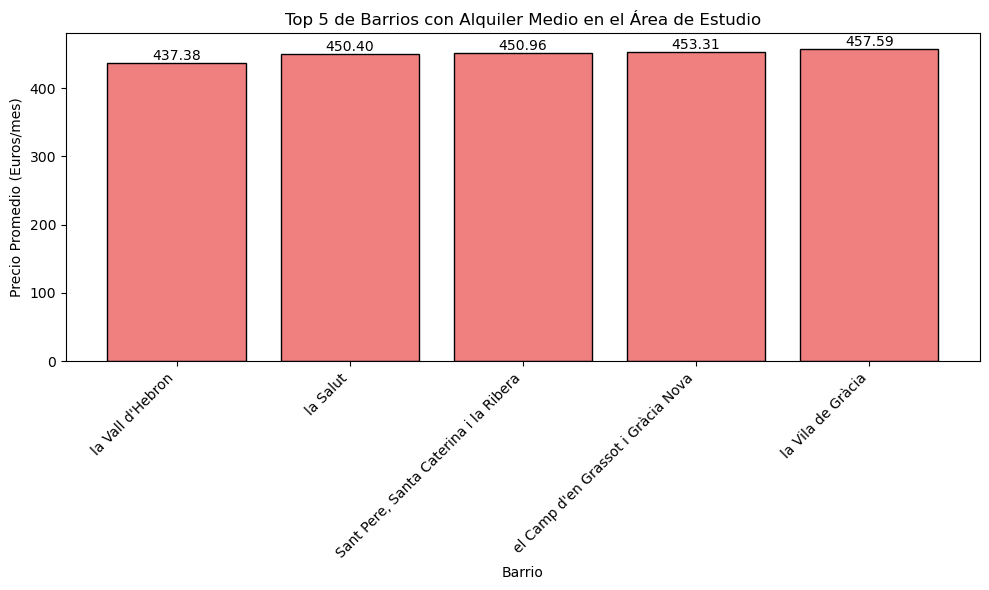

In [67]:
import matplotlib.pyplot as plt

# Calcular el precio promedio por barrio
precio_promedio_por_barrio = df.groupby('Nom_Barri')['Preu'].mean().reset_index()

# Calcular el precio promedio general de todos los barrios
precio_promedio_general = precio_promedio_por_barrio['Preu'].mean()

# Calcular la diferencia entre el precio promedio de cada barrio y el precio promedio general
precio_promedio_por_barrio['Diferencia'] = abs(precio_promedio_por_barrio['Preu'] - precio_promedio_general)

# Seleccionar los 5 barrios con las diferencias más pequeñas (alquiler medio)
barrios_alquiler_medio = precio_promedio_por_barrio.nsmallest(5, 'Diferencia')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar = plt.bar(barrios_alquiler_medio['Nom_Barri'], barrios_alquiler_medio['Preu'], color='lightcoral', edgecolor='black')

# Títulos y etiquetas
plt.title('Top 5 de Barrios con Alquiler Medio en el Área de Estudio')
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio (Euros/mes)')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha="right")
for rect in bar:
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2, height,
        f'{height:.2f}',  # Formato para mostrar dos decimales
        ha='center', va='bottom'
)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

